<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## SETUP

We'll import a few common modules, check for python versions, setup the libraries and define some key helper functions

In [1]:
# To ensure Python ≥ 3.5 is used
import sys
assert sys.version_info >= (3, 5)

#Check if it is running in Kaggle or Colab
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

#Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#common imports
import numpy as np
import os


#for uniformity in output
np.random.seed(42)


#for our plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)


#Where we save our figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


#To handle saving of the figures
def save_fig(fig_id, tight_layout=True, fig_extension ="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST DATASET

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and keep the same code as in the book, we use `as_frame=False`.

In [2]:
#We'll use scikit-learn built-in popular datasets
#Our version is not up to 0.24 (0.21.3)
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1) #as_frame=False 
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
#Taking a look at the shape of the data
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

So there are 28 x 28 pixels intensities  for each instance.

In [4]:
y.shape

(70000,)

Saving figure some_digit_plot


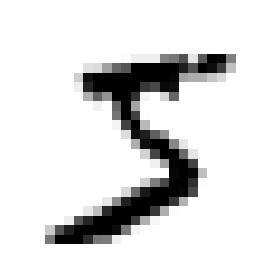

In [5]:
#Let's have a look at some digit and plot the image using mpl

some_digit = X[0]
some_digit_image  = some_digit.reshape(28,28) #We create a 28 x 28 array
plt.imshow(some_digit_image, cmap=mpl.cm.binary) #Plotted in greyscale
plt.axis("off") # we don't want any axes to show

save_fig("some_digit_plot") #our custom func
plt.show()

In [6]:
#Let's confirm that this is a "5"
y[0]

'5'

The target values are in strings, for speed and efficiency, we would prefer to work with ints


In [7]:
y = y.astype(np.uint8)

In [8]:
#Lets create a function for plotting the digits (instances)

def plot_digit(data):
    
    """ a function for plotting the digits (instances) """
    
    image = data.reshape(28,28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")


In [9]:
## Another function for plotting multiple digits

def plot_digits(instances, images_per_row=10, **options):
    """ a function for plotting multiple digits (instances) """
    size = 28
    images_per_row = min(len(instances), images_per_row) #images per row at most 10
    
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = ((len(instances)-1) // images_per_row) + 1
    
    #Append empty images to fill the end of the grid if needed:
    n_empty = n_rows * images_per_row  - len(instances) 
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis = 0)
    
    #Reshape the array so it's organized as a grid containing 28x28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    
    
    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)

    #Now that we have a big image, we just show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off") 
    
    

Saving figure more_digits_plot


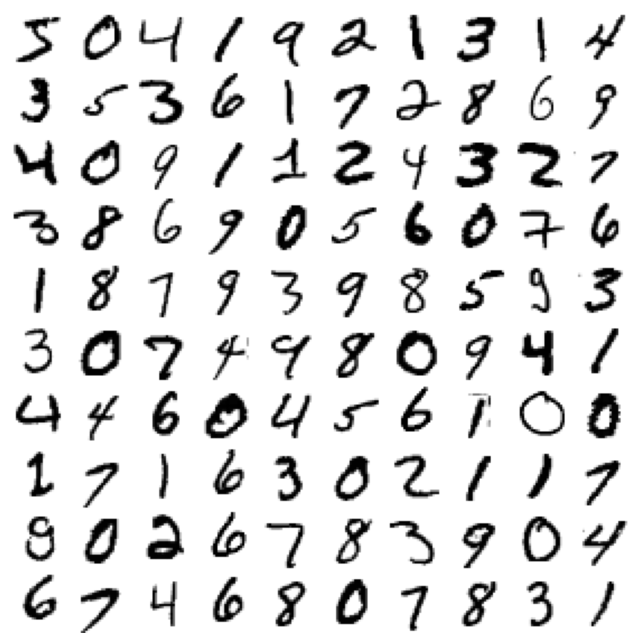

In [10]:
#Let's use our func

plt.figure(figsize=(9,9))
example_images = X[:100]  #We will look at the first 100 images
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

We see that this is actually how the dataset is arranged, becuase y[0] is 5

The MNIST dataset is already split into training and test set for use first 60,000 is the train set and the last 10,000 is the test set.

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 1. Training a Binary Classifier

This binary classifier will classify 5 and not-5

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
#We would perform a 3 fold Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv= 5, scoring="accuracy")

array([0.96466961, 0.957     , 0.95516667, 0.95733333, 0.96733061])

**Some Performance Measures**

1. Cross Validation

In [16]:
#Making our own cross validator

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    #We fit for every other fold not the test index and evaluate on the test index
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

0.9559
0.9559
0.96565


In [17]:
#Let us train a dumb classifier that predicts everything as not 5

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

This shows that normal cross validation is pretty useless

**Warning**: 
* first, Scikit-Learn and other libraries evolve, and algorithms get tweaked a bit, which may change the exact result you get. If you use the latest Scikit-Learn version (and in general, you really should), you probably won't be using the exact same version I used when I wrote the book or this notebook, hence the difference. I try to keep this notebook reasonably up to date, but I can't change the numbers on the pages in your copy of the book.
* second, many training algorithms are stochastic, meaning they rely on randomness. In principle, it's possible to get consistent outputs from a random number generator by setting the seed from which it generates the pseudo-random numbers (which is why you will see `random_state=42` or `np.random.seed(42)` pretty often). However, sometimes this does not suffice due to the other factors listed here.
* third, if the training algorithm runs across multiple threads (as do some algorithms implemented in C) or across multiple processes (e.g., when using the `n_jobs` argument), then the precise order in which operations will run is not always guaranteed, and thus the exact result may vary slightly.
* lastly, other things may prevent perfect reproducibility, such as Python dicts and sets whose order is not guaranteed to be stable across sessions, or the order of files in a directory which is also not guaranteed.

2. Confusion Matrix

In [19]:
#We will use cross_val_predict to get cross validated predictions

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred) 

# true negatives is C_{0,0}, false negatives is C_{1,0}
# false positives is C_{0,1} and true positives is C_{1,1} 



array([[53677,   902],
       [ 1480,  3941]], dtype=int64)

In [21]:
#Let's see what a perfect confusion matrix looks like
y_train_perfect_predictions = y_train_5  
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

3. Precision and Recall


In [22]:
#these can be calculated from a confusion matrix 

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8137518067313648

In [23]:
#Manually calculating it from a confusion matrix
cm = confusion_matrix(y_train_5, y_train_pred) 
cm[1, 1] / (cm[0, 1] + cm[1, 1]) # TP/(FP + TP)

0.8137518067313648

In [24]:
recall_score(y_train_5, y_train_pred) 

0.7269876406567054

In [25]:
cm[1, 1] / (cm[1, 0] + cm[1, 1]) # TP/(FN + TP)

0.7269876406567054

In [26]:
#A more compact metric is f1 score which is the harmonic mean of the two
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred) 

0.7679267342166797

In [27]:
#Calculating this manually
cm[1, 1]/ (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)  #2/((1/recall) + (1 / precision))

# or TP/(TP + (FP + FN)/2)

0.7679267342166797

3. Precision/ Recall Trade-off

In [28]:
#We can get the scores for the prediction using this
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [29]:
#Based on this we can now run a prediction after setting a particular threshold
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
#So we do this for the cross validator predict and get the prediction scores 
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [31]:
#To get the optimum threshold value we need to plot some curves
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


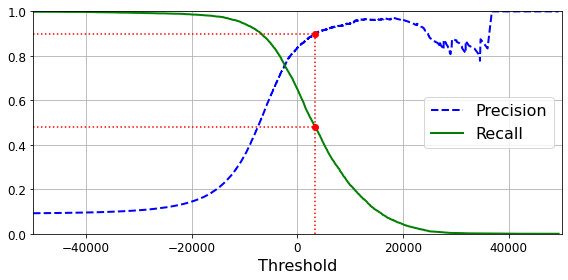

In [32]:
#Let's define a function to plot the precision and recall vs threshold and plot it

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
#We would get the max arg i.e the first true value    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

#We'll plot it
plt.figure(figsize= (8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [33]:
#Let's check that our previous prediction had scores above 0 
(y_train_pred == (y_scores > 0)).all()

False

Saving figure precision_vs_recall_plot


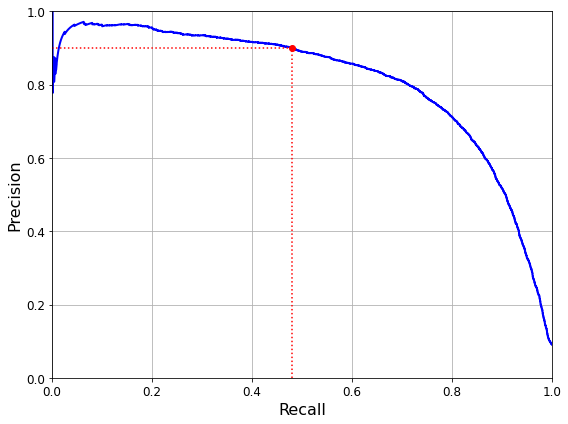

In [34]:
#For clarity too we shall plot precision vs Recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
   
   
 #And we plot it
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()
 
    

In [35]:
#Let's view our threshold value for a 90% prediction
#threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

threshold_90_precision

3370.0194991439557

In [36]:
#To make predictions we would just check for values above the threshold
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [37]:
#Let's confirm that the precision is about 90%
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [38]:
#Let's check for the recall score
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

4. The ROC Curve

In [39]:
#another metric
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


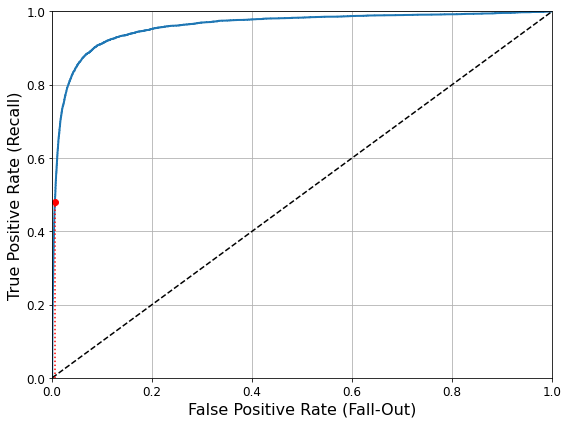

In [40]:
#Lets create a function to plot the roc curve

def plot_roc_curve(fpr, tpr, label= None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")   #dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (Fall-Out)", fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True) 
    
    
#Then we plot it 

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

#Getting the same metric to show on this plot
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0.0, recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "g:")
plt.plot([fpr_90], [recall_90_precision], "ro")
save_fig("roc_curve_plot")
plt.show()


In [41]:
#We can get the score of the area under the roc curve
#The closer to 1, the higher the better
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [42]:
#Let's train a Random forest classifier to compare to our sgd binary classifier

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

#we would get the probabilities for each prediction
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")



In [43]:
#We would use thes probabilities as scores
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

#then we get the tpr and fpr values for the Random forest classifier
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,
                                                      y_scores_forest)

Saving figure roc_curve_comparison_plot


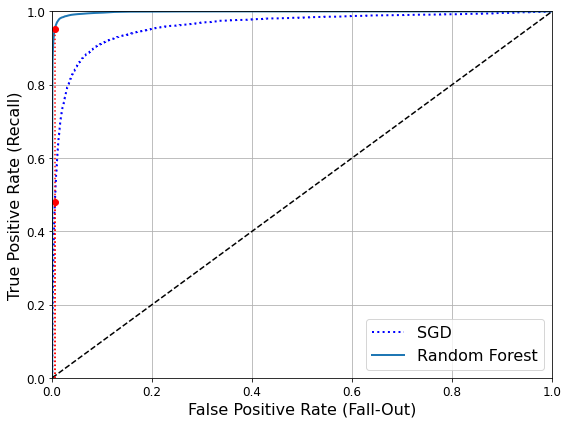

In [44]:
# lets get the equivalent recall at 90% precision
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

#We'll plot it's roc directly on top of the roc the sgd classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [45]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

This classifier provides a roc auc score

In [46]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [47]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

And better much precision and recall scores !!

## 2. TRAINING A MULTICLASS CLASSIFIER

In [48]:
#Sci-kit learn performs OvO automatically on SVCs

from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
#We would just train on the prepartioned Train set 
# we are using the real labels and not the 5 versus all labels
svm_clf.fit(X_train[:1000], y_train[:1000]) 
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [49]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [50]:
#to check that it is actually the highest score that is chosen

np.argmax(some_digit_scores)

5

In [51]:
#svm stores the classes
svm_clf.classes_[5]

5

In [52]:
#I'd force the SVC to use an OvA technique
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [53]:
#I'll check for the number of estimators
len(ovr_clf.estimators_)

10

In [54]:
ovr_digit_scores = ovr_clf.decision_function([some_digit])
ovr_digit_scores

array([[-0.9990256 , -0.99963766, -0.99949709, -0.99902667, -0.99986906,
         0.10132159, -0.99976287, -0.99933311, -0.99943631, -0.99924045]])

In [55]:
#The Sgd classifier defaults to OvA automatically
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [56]:
#Let's check the scores for the sgd classifier
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

**Warning** : The next two cells takes up to 30 minutes to run

In [57]:
#Let's evaluate the sgd classifier
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [58]:
#Scaling the Input improves the accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


C:\ProgramData\Anaconda3\envs\myMLenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

# Error Analysis

In [59]:
#LEt's see the confusio matrix of the multiclass sgd classifier
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\ProgramData\Anaconda3\envs\myMLenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]],
      dtype=int64)

Our model is reasonably accurate, most of the values are along the diagonal (Correct prediction)

Saving figure confusion_matrix_plot


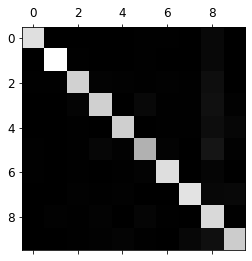

In [60]:
#Let's visualize the confusion matrix

plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [61]:
#Plotting the confusion matrix in color
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_colour_plot


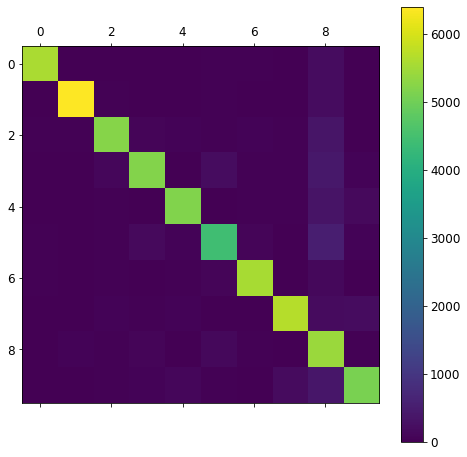

In [65]:
plot_confusion_matrix(conf_mx)
save_fig("confusion_matrix_colour_plot", tight_layout=False)

In [66]:
#Let's separate the classes and normalise per class
#so that abundant classes don't look bad

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


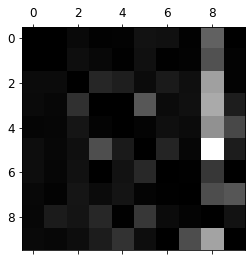

In [67]:
#Let's remove the correct classification (Diagonal)
#And focus only on the errors
#We'll fill the diagonal with zeros

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure conf_matrix_errors_colour_plot


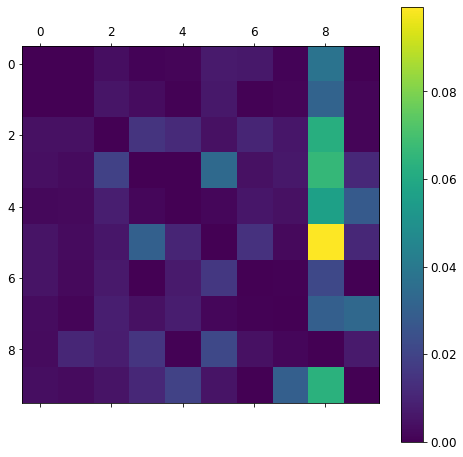

In [68]:
plot_confusion_matrix(norm_conf_mx)
save_fig("conf_matrix_errors_colour_plot", tight_layout=False)

5 is badly misclassifed as an 8. Also 3 and 5 are confused for themselves (same colours for both meeting points)

In [69]:
#Let's observe the mistakes of the classification off 3 and 5

cl_a, cl_b = 3, 5
#X_aa is 3 and is classified as 3
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]

#X_ab is 3 but is classifed as 5
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]

#The same logic
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


Saving figure error_analysis_digits_plot


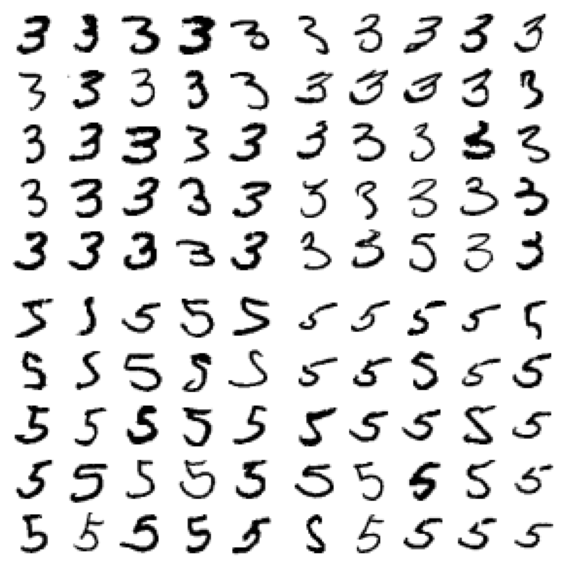

In [70]:
#Let's plot these values to see the mistakes

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

We can see that we would require a lot of preprocessing to clean this data and reduce errors, we may need to add more prediction steps and features  (Probably try to centre the values more recognize loop (maybe with OpenCV) and then count these loops as a new feature)

## MULTILABEL CLASSIFICATION